In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [2]:
# 1. 데이터 가져오기 (예시: CSV 파일에서 읽어오기)
df = pd.read_csv('/content/monthly_revenue.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [3]:
df.head()

,Monthly_Revenue
Month,
2018-12-01,4234147.48
2019-01-01,3649506.42
2019-02-01,3299537.56
2019-03-01,4353308.78
2019-04-01,3416109.24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


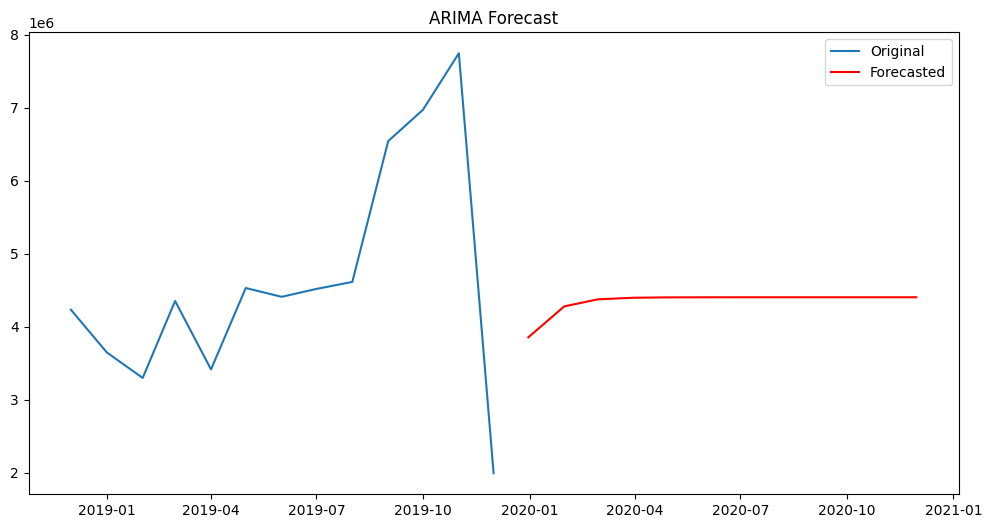

In [17]:
# 2. ARIMA 모델로 예측하기
model_arima = ARIMA(df['Monthly_Revenue'], order=(1,1,1))
model_arima_fit = model_arima.fit()
predictions_arima = model_arima_fit.forecast(steps=12)

# Create the date range for the forecasted data without the closed='right' option
forecast_dates = pd.date_range(df.index[-1], periods=12, freq='M')

# Plotting again
plt.figure(figsize=(12, 6))
plt.plot(df['Monthly_Revenue'], label='Original')
plt.plot(forecast_dates, predictions_arima, color='red', label='Forecasted')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkl187rcj/xufcx9kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkl187rcj/etq48nl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3375', 'data', 'file=/tmp/tmpkl187rcj/xufcx9kg.json', 'init=/tmp/tmpkl187rcj/etq48nl5.json', 'output', 'file=/tmp/tmpkl187rcj/prophet_modelfaixi7jt/prophet_model-20230919041448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

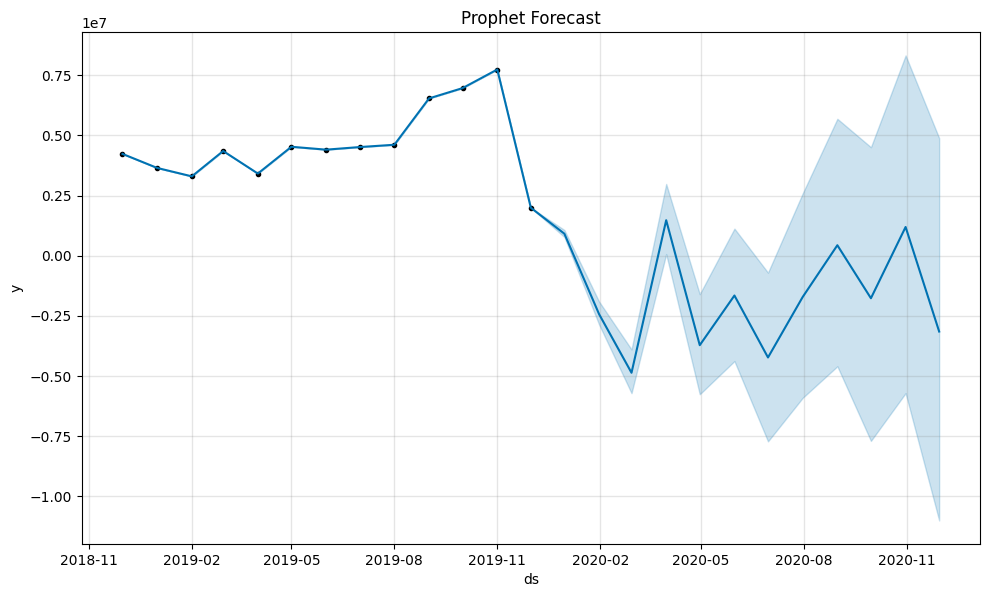

In [12]:
# 3. Prophet 모델로 예측하기
df_prophet = df.reset_index()
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

model_prophet.plot(forecast)
plt.title('Prophet Forecast')
plt.show()